In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [29]:
#Leitura do Dataset com pandas
header=['ano_trab', 'nivel_exp', 'tipo_cont', 'funcao', 'salario', 'moeda', 'salario_dol', 'pais_resid', 'perc_remoto', 'local_empresa', 'tam_empresa']
df2 = pd.read_csv('/content/ds_salaries.csv', header=None, names=header, skiprows=1)
df2.head()

,ano_trab,nivel_exp,tipo_cont,funcao,salario,moeda,salario_dol,pais_resid,perc_remoto,local_empresa,tam_empresa
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [43]:
#Verificando os registros do Dataset com pandas
ano_min=df2['ano_trab'].sort_values().min()
ano_max=df2['ano_trab'].sort_values().max()
print('o range de datas varia entre ',ano_min,' e ',ano_max)

exper=df2['nivel_exp'].sort_values().unique()
print('os graus de experiencia sao: ',exper)

contract=df2['tipo_cont'].sort_values().unique()
print('os tipos de contrato sao: ',contract)

#func=df2['funcao'].sort_values().unique()
func=df2['funcao'].value_counts()
func2=len(func)
print('existem ',func2, ' diferentes funcoes')

sal_min=df2['salario'].sort_values().min()
sal_max=df2['salario'].sort_values().max()
print('os salarios variam entre ',sal_min, ' e ', sal_max)

moeda=df2['moeda'].sort_values().unique()
print('os pagamentos sao feitos nas seguintes moedas: ',moeda)

dol=df2['salario_dol'].sort_values().unique()
print('os salarios em solares varaiam entre: ',dol)

pais=df2['pais_resid'].sort_values().unique()
print('os funcionarios sao dos seguintes paises: ',pais)

remoto=df2['perc_remoto'].sort_values().unique()
print('os percentuais de trabalho remoto sao: ',remoto)

emp=df2['local_empresa'].sort_values().unique()
print('as empresas estao nos seguintes paises: ',emp)

tam=df2['tam_empresa'].sort_values().unique()
print('as empresas são dos seguintes portes: ',tam)

#Melhoria do Código acima proposta pelo ChatGPT
def print_unique_values(df, column_name, description):
    values = df[column_name].sort_values().unique()
    print(description, values)

# Verificando os registros do Dataset com pandas
ano_min = df2['ano_trab'].min()
ano_max = df2['ano_trab'].max()
print('O range de datas varia entre', ano_min, 'e', ano_max)

print_unique_values(df2, 'nivel_exp', 'Os graus de experiência são:')
print_unique_values(df2, 'tipo_cont', 'Os tipos de contrato são:')
print('Existem', len(df2['funcao'].value_counts()), 'diferentes funções')

sal_min = df2['salario'].min()
sal_max = df2['salario'].max()
print('Os salários variam entre', sal_min, 'e', sal_max)

print_unique_values(df2, 'moeda', 'Os pagamentos são feitos nas seguintes moedas:')
print_unique_values(df2, 'salario_dol', 'Os salários em dólares variam entre:')
print_unique_values(df2, 'pais_resid', 'Os funcionários são dos seguintes países:')
print_unique_values(df2, 'perc_remoto', 'Os percentuais de trabalho remoto são:')
print_unique_values(df2, 'local_empresa', 'As empresas estão nos seguintes países:')
print_unique_values(df2, 'tam_empresa', 'As empresas são dos seguintes portes:')

o range de datas varia entre  2020  e  2023
os graus de experiencia sao:  ['EN' 'EX' 'MI' 'SE']
os tipos de contrato sao:  ['CT' 'FL' 'FT' 'PT']
existem  93  diferentes funcoes
os salarios variam entre  6000  e  30400000
os pagamentos sao feitos nas seguintes moedas:  ['AUD' 'BRL' 'CAD' 'CHF' 'CLP' 'CZK' 'DKK' 'EUR' 'GBP' 'HKD' 'HUF' 'ILS'
 'INR' 'JPY' 'MXN' 'PLN' 'SGD' 'THB' 'TRY' 'USD']
os salarios em solares varaiam entre:  [  5132   5409   5679 ... 423834 430967 450000]
os funcionarios sao dos seguintes paises:  ['AE' 'AM' 'AR' 'AS' 'AT' 'AU' 'BA' 'BE' 'BG' 'BO' 'BR' 'CA' 'CF' 'CH'
 'CL' 'CN' 'CO' 'CR' 'CY' 'CZ' 'DE' 'DK' 'DO' 'DZ' 'EE' 'EG' 'ES' 'FI'
 'FR' 'GB' 'GH' 'GR' 'HK' 'HN' 'HR' 'HU' 'ID' 'IE' 'IL' 'IN' 'IQ' 'IR'
 'IT' 'JE' 'JP' 'KE' 'KW' 'LT' 'LU' 'LV' 'MA' 'MD' 'MK' 'MT' 'MX' 'MY'
 'NG' 'NL' 'NZ' 'PH' 'PK' 'PL' 'PR' 'PT' 'RO' 'RS' 'RU' 'SE' 'SG' 'SI'
 'SK' 'TH' 'TN' 'TR' 'UA' 'US' 'UZ' 'VN']
os percentuais de trabalho remoto sao:  [  0  50 100]
as empresas estao nos segui

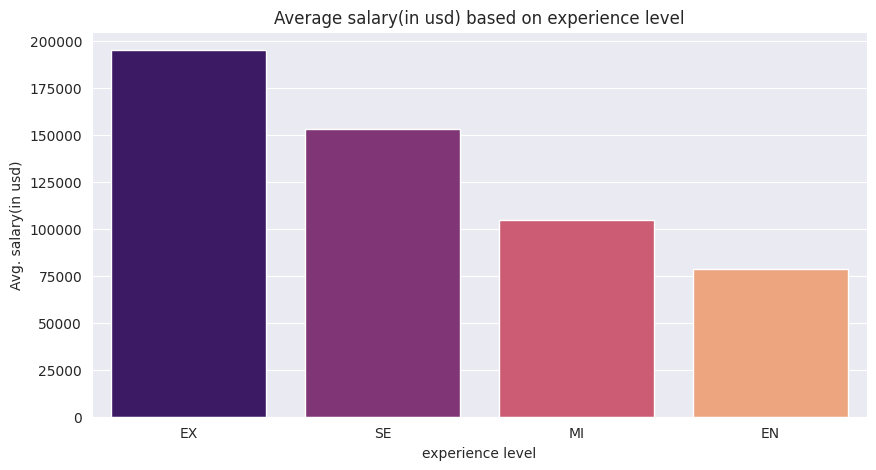

In [48]:
fig=plt.figure(figsize=(10,5))
'''grouping data based on experience level and storing it in temp variable, 
to observe the relationship between salaries and experience level'''
temp=df2.groupby('nivel_exp')['salario_dol'].mean().sort_values(ascending=False).to_frame()
temp.reset_index(inplace=True)
sns.set_style('darkgrid')
sns.barplot(x='nivel_exp',y='salario_dol',data=temp,palette='magma')
plt.xlabel('experience level')
plt.ylabel('Avg. salary(in usd)')
plt.title('Average salary(in usd) based on experience level')
plt.savefig('/content/grafico.pdf')